In [1]:
import os
os.sys.path
import sys
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import cv2
from PIL import Image
from imutils import paths
import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [2]:
data =r'C:\Users\Adrian\Desktop\CENTENNIAL\COMP263\Project\Dog Emotion'
Img_Paths = list(paths.list_images(data))

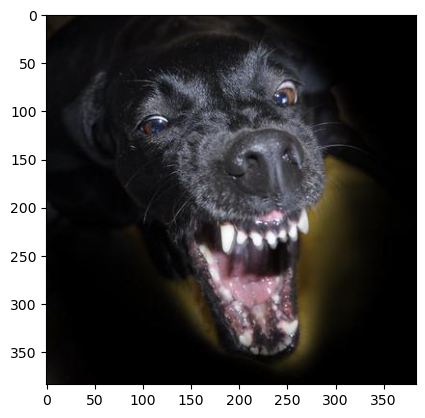

In [3]:
sample_img1 = Image.open(Img_Paths[200])
plt.imshow(sample_img1)

In [4]:
labels_df = pd.read_csv(r'C:\Users\Adrian\Desktop\CENTENNIAL\COMP263\Project\Dog Emotion\labels.csv')
labels_df


,Unnamed: 0,filename,label
0,0,yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg,sad
1,1,c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg,sad
2,2,RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg,angry
3,3,gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg,angry
4,4,U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg,relaxed
...,...,...,...
3995,3995,3e7ne7hPR6zHzv8kjUkZ0DKoJNatJX22.jpg,angry
3996,3996,VxNty5XbeMojF1gpkRYG4yyBySQ4sC351.jpg,relaxed
3997,3997,i6WrJri63JSzctcnOJ8C94Nb5Gyugo629.jpg,sad
3998,3998,LMrUNwljuck3MxuzNaBbeAEMkofN7Q718.jpg,angry


In [5]:
class_names = labels_df['label'].unique()
class_names = class_names.tolist()

In [6]:
class_names

['sad', 'angry', 'relaxed', 'happy']

In [7]:
images = []
labels = []
img_size = (192, 192, 3)

for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(data + '\\' + image[2] + '\\' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
    
    # labels will be in the form of a vector: [0, 1, 0, 0] or [1, 0, 0, 0]
    label = np.zeros(len(class_names))
    label[class_names.index(image[2])] = 1
    labels.append(label)

In [8]:
labels = np.asarray(labels)
images = np.asarray(images)

In [9]:
images.shape

(4000, 192, 192, 3)

In [10]:
labels.shape

(4000, 4)

In [11]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [12]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

In [13]:
X_train.shape

(3400, 192, 192, 3)

## Supervised 

In [14]:
# Define batch size and number of epochs
BATCH_SIZE = 32
EPOCHS = 25

In [15]:
#Create CNN
model_cnn = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(img_size)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.optimizer.lr=0.001
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 70688)             0         
                                                                 
 dense (Dense)               (None, 64)                4

In [16]:
history_cnn = model_cnn.fit(images, labels, epochs=EPOCHS, validation_data=(X_val, y_val))
model_cnn.save('model_cnn.hdf5')

Epoch 1/25
125/125 [==============================] - 192s 2s/step - loss: 31.5135 - accuracy: 0.2890 - val_loss: 1.2881 - val_accuracy: 0.4050
Epoch 2/25
125/125 [==============================] - 188s 2s/step - loss: 1.2937 - accuracy: 0.3602 - val_loss: 1.2422 - val_accuracy: 0.4400
Epoch 3/25
125/125 [==============================] - 192s 2s/step - loss: 1.2452 - accuracy: 0.3997 - val_loss: 1.1993 - val_accuracy: 0.4533
Epoch 4/25
125/125 [==============================] - 187s 1s/step - loss: 1.1465 - accuracy: 0.4660 - val_loss: 0.9315 - val_accuracy: 0.6167
Epoch 5/25
125/125 [==============================] - 189s 2s/step - loss: 1.0329 - accuracy: 0.5508 - val_loss: 0.8388 - val_accuracy: 0.7033
Epoch 6/25
125/125 [==============================] - 188s 2s/step - loss: 0.8959 - accuracy: 0.6273 - val_loss: 0.6801 - val_accuracy: 0.7617
Epoch 7/25
125/125 [==============================] - 189s 2s/step - loss: 0.7738 - accuracy: 0.6798 - val_loss: 0.4869 - val_accuracy: 0.830

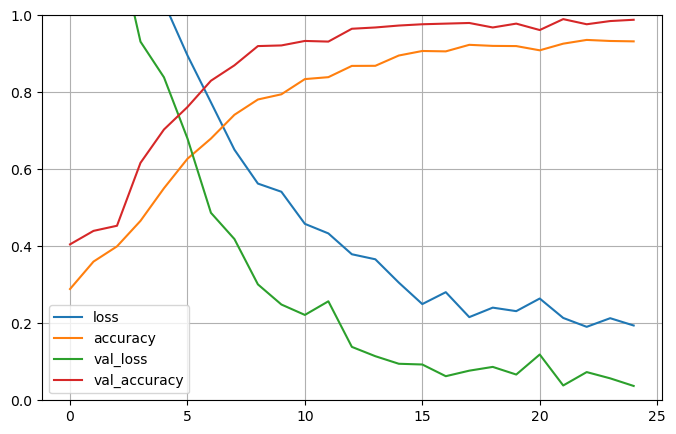

In [17]:
#Evaluate the model
pd.DataFrame(history_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
pred_cnn = model_cnn.predict(X_val)
pred_cnn = np.argmax(pred_cnn, axis=1)

19/19 [==============================] - 7s 309ms/step


In [19]:
i,true_cnn = np.where(y_val == 1)

In [20]:
print(classification_report(true_cnn, pred_cnn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       157
           1       0.99      1.00      1.00       136
           2       0.97      1.00      0.98       156
           3       0.99      0.99      0.99       151

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## Inception

In [21]:
# Load pre-trained InceptionV3 model
base_inc = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size))

In [22]:
from keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)
# Add new classification layers to the model
x = base_inc.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(4, activation='softmax')(x)
model_inc = Model(inputs=base_inc.input, outputs=predictions)

In [23]:
# Freeze the pre-trained layers in the base model
for layer in base_inc.layers:
    layer.trainable = False

In [24]:
# Compile the model with Adam optimizer and categorical cross-entropy loss function
model_inc.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history_inc = model_inc.fit(
    images,
    labels,
    epochs=EPOCHS,
    validation_data=(X_val,y_val)
)
model_inc.save('model_inc.hdf5')

Epoch 1/25
125/125 [==============================] - 198s 1s/step - loss: 18.2029 - accuracy: 0.2788 - val_loss: 2.4220 - val_accuracy: 0.3300
Epoch 2/25
125/125 [==============================] - 186s 1s/step - loss: 2.2199 - accuracy: 0.3217 - val_loss: 1.7290 - val_accuracy: 0.3333
Epoch 3/25
125/125 [==============================] - 195s 2s/step - loss: 1.8755 - accuracy: 0.3478 - val_loss: 1.5888 - val_accuracy: 0.3933
Epoch 4/25
125/125 [==============================] - 194s 2s/step - loss: 1.5249 - accuracy: 0.3742 - val_loss: 1.4189 - val_accuracy: 0.3967
Epoch 5/25
125/125 [==============================] - 186s 1s/step - loss: 1.4223 - accuracy: 0.3828 - val_loss: 1.3935 - val_accuracy: 0.4150
Epoch 6/25
125/125 [==============================] - 186s 1s/step - loss: 1.3605 - accuracy: 0.3923 - val_loss: 1.2836 - val_accuracy: 0.4283
Epoch 7/25
125/125 [==============================] - 186s 1s/step - loss: 1.2751 - accuracy: 0.4227 - val_loss: 1.1466 - val_accuracy: 0.493

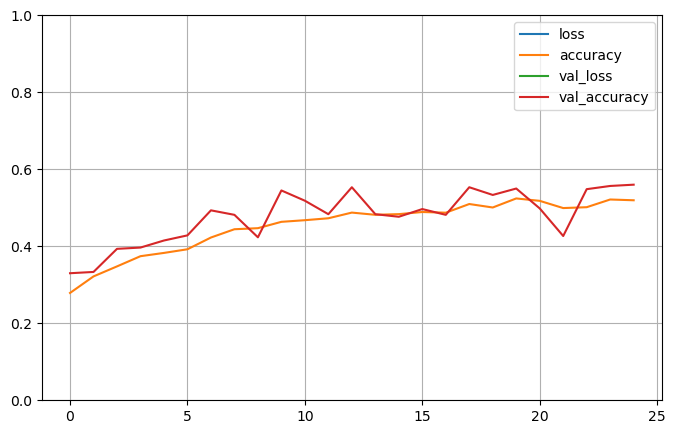

In [26]:
#Evaluate the model
pd.DataFrame(history_inc.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
pred_inc = model_inc.predict(X_val)
pred_inc = np.argmax(pred_inc, axis=1)

19/19 [==============================] - 27s 1s/step


In [28]:
i,true_inc = np.where(y_val == 1)

In [29]:
print(classification_report(true_inc, pred_inc))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       157
           1       0.71      0.48      0.57       136
           2       0.55      0.42      0.47       156
           3       0.44      0.85      0.58       151

    accuracy                           0.56       600
   macro avg       0.62      0.56      0.56       600
weighted avg       0.62      0.56      0.56       600

